### Combinatorial Decision Making and Optimization Module-2 taught by Vittorio Maniezzo

### Name of the Student: Yellam Naidu Kottavalasa

#### Implementation of Backpropagation Algorithm

Banking Organization deals in all loans. They have presence across all types of Loans. Customer first apply for loan after that bank validates the customer eligibility for loan. Bank wants to automate the loan eligibility process based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

The machine learning model is trained using the training data set. Every new applicant details filled at the time of application form acts as a test data set. On the basis of the training data sets, the model will predict whether a loan would be approved or not. We have 13 features in total out of which we have 12 independent variables and 1 dependent variable.

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("D:/ML_Project/loan.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
#Returns tuple of shape (Rows, columns) of dataframe/series
data.shape

(614, 13)

In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# replacing the missing values with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
data['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [10]:
# categorized each of my variables into numbers
Catos = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for cato in Catos:
    data[cato] = data[cato].astype('category').cat.codes

In [11]:
#Here drop our target variable from the train dataset and save it in another dataset.
x = data.drop('Loan_Status',axis=1)
x = x.drop('Loan_ID',axis=1)
y = data.Loan_Status                 # Save target variable in separate dataset

In [12]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [13]:
x=x.values
x

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [14]:
y=y.values
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
#HYPERPARAMETERS

#num of target labels
num_classes =1

#define layer_neurons
input_units  = 11  #neurons in input layer
hidden_units = 7  #neurons in hidden layer
output_units = 1  #neurons in output layer

#define hyper-parameters
learning_rate = 0.0001

In [17]:
# parameters
def initialize_parameters():
    #initial values should have zero mean and 0.1 standard devation
    mean=0
    std=0.1
    layer1_weights=np.random.normal(mean,std,(input_units,hidden_units))
    layer2_weights=np.random.normal(mean,std,(hidden_units,output_units))
    parameters=dict()
    parameters['layer1_weights']=layer1_weights
    parameters['layer2_weights']=layer2_weights
    return parameters

In [18]:
def sigmoid(X):
    return 1/(1+np.exp(-1*X))

In [19]:
def forward_propagation(train_dataset,parameters):
    cache=dict()  # to store the intermediate values for back propogation
    m=len(train_dataset)      #number of training example
    
    # get the parameters
    layer1_weights=parameters['layer1_weights']
    layer2_weights=parameters['layer2_weights']
    
    #forward propagation
    l1=np.matmul(train_dataset,layer1_weights)
    activation1=np.array(sigmoid(l1)).reshape(m,hidden_units)
    activation2=np.array(np.matmul(activation1,layer2_weights)).reshape(m,output_units)
    output=np.array(sigmoid(activation2)).reshape(m,num_classes)
    
    #fill the cache
    cache['output']=output
    cache['activation1']=activation1
    
    return cache,output

In [20]:
def back_propagation(train_dataset,train_labels,parameters,cache):
    
    derivatives=dict()
    #get stuff from cache
    output = cache['output']
    activation1 = cache['activation1']
    
    #get parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights=parameters['layer2_weights']
    
    #calculate errors
    error_output = output - train_labels
    
    error_activation1 = np.matmul(error_output,layer2_weights.T) 
    error_activation1 = np.multiply(error_activation1,activation1) # hidden layer error
    error_activation1 = np.multiply(error_activation1,1-activation1) # output layer error
    
    
    #calculate partial derivatives
    partial_derivatives2 = np.matmul(activation1.T,error_output)/len(train_dataset) #derivative wrt weight w at hidden layer weight
    partial_derivatives1 = np.matmul(train_dataset.T,error_activation1)/len(train_dataset)# derivative wrt x at first layer weight
    
    #store the derivatives
    derivatives['partial_derivatives1'] = partial_derivatives1
    derivatives['partial_derivatives2'] = partial_derivatives2
    
    return derivatives

In [21]:
#update the parameters
def update_parameters(derivatives,parameters):
    #get the parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #get the derivatives
    partial_derivatives1 = derivatives['partial_derivatives1']
    partial_derivatives2 = derivatives['partial_derivatives2']
    
    #update the derivatives
    layer1_weights -= (learning_rate*(partial_derivatives1 )) 
    layer2_weights -= (learning_rate*(partial_derivatives2 ))
    
    #update the dict
    parameters['layer1_weights'] = layer1_weights
    parameters['layer2_weights'] = layer2_weights
    
    return parameters

Binary cross entropy or Log loss compares each of the predicted probabilities to actual class output which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value. That means how close or far from the actual value.

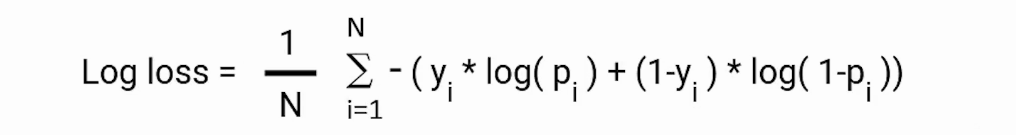

In [22]:
#calculate the loss and accuracy
def cal_loss_accuray(train_labels,predictions,parameters):
    accuracy=0
    
    #calculate loss and accuracy   
    loss = -1*np.sum(np.multiply(np.log(predictions),train_labels) + np.multiply(np.log(1-predictions),(1-train_labels)))/len(train_labels)
    predict=[]
    for i in predictions:
        if(i>=0.5):
            predict.append(1)
        else:
            predict.append(0)
    for i in range(0,len(predict)):
        if(train_labels[i]==predict[i]):
            accuracy+=1
    accuracy /= len(x_train)
    
    return loss,accuracy

In [23]:
#Implementation of 3 layer Neural Network

#training function
def train(train_dataset,train_labels,iters):
    #To store loss after every iteration.
    losslist = []
  
    #WEIGHTS
    global layer1_weights
    global layer2_weights
  
    #initialize the parameters
    parameters = initialize_parameters()
    
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #to store final predictons after training
    final_output = []
    
    for j in range(iters):
        #forward propagation
        cache,output = forward_propagation(train_dataset,parameters)
        
        #backward propagation
        derivatives = back_propagation(train_dataset,train_labels,parameters,cache)
        
        #update the parameters
        parameters = update_parameters(derivatives,parameters)
        
        #calculate the loss and accuracy
        loss,accuracy = cal_loss_accuray(train_labels,output,parameters)
        
        #append loss
        losslist.append(loss)
        
        #update final output
        final_output = output  
        
        #print accuracy and loss
        if(j%1000==0):
            print("Step: %d"%j)
            print("Loss: %f"%loss)
            print("Accuracy: %f%%"%(accuracy*100))
    
    return losslist,final_output

In [24]:
y_trains=[]
for i in y_train:
    l=[i]
    y_trains.append(l)
y_trains=np.asmatrix(y_trains)

In [26]:
import warnings
warnings.filterwarnings( "ignore" )
losslist,final_output = train(x_train,y_trains,10000)

Step: 0
Loss: 0.736479
Accuracy: 31.975560%
Step: 1000
Loss: 0.720379
Accuracy: 31.975560%
Step: 2000
Loss: 0.708531
Accuracy: 31.975560%
Step: 3000
Loss: 0.698301
Accuracy: 45.621181%
Step: 4000
Loss: 0.689467
Accuracy: 68.024440%
Step: 5000
Loss: 0.681832
Accuracy: 68.024440%
Step: 6000
Loss: 0.675201
Accuracy: 68.024440%
Step: 7000
Loss: 0.669452
Accuracy: 68.024440%
Step: 8000
Loss: 0.664473
Accuracy: 68.024440%
Step: 9000
Loss: 0.660148
Accuracy: 68.024440%
